In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Make list of zlib files
zlib_dir = "results_zlib"
zlib_files = []

for root, dirs, files in os.walk(zlib_dir):
    for file in files:
        zlib_files.append(os.path.join(root, file))
        
# Make list of sz3 files
sz3_dir = "results_sz3"
sz3_files = []

for root, dirs, files in os.walk(sz3_dir):
    for file in files:
        sz3_files.append(os.path.join(root, file))

zlib_files.sort()
sz3_files.sort()

In [3]:
# Read files into dataframes
zlib_df = pd.DataFrame()
for file in zlib_files:
    df = pd.read_csv(file)
    zlib_df = pd.concat([zlib_df, df], ignore_index=True)
    
sz3_df = pd.DataFrame()
for file in sz3_files:
    df = pd.read_csv(file)
    sz3_df = pd.concat([sz3_df, df], ignore_index=True)

In [4]:
#Cleanup
zlib_df["compressionLevel"] = zlib_df["compressionLevel"].astype("category")

zlib_df.head()

,system,timestamp,name,bitsTruncated,compressionLevel,noise,data size (bytes),min,max,compression_time (ms),decompression_time (ms),compression_ratio,compression_error_avg,compression_error_min,compression_error_max
0,Morgana,1744220091138930737,paramSweep_zlib_NoisyPoly,13,1,0.5,10000000,-1.947682,3.277461,239.1,48.0,1.650838,0.000114,0,0.000976
1,Morgana,1744220094581009570,paramSweep_zlib_NoisyPoly,13,2,0.5,10000000,-1.947682,3.277461,279.9,44.7,1.672053,0.000114,0,0.000976
2,Morgana,1744220099476739222,paramSweep_zlib_NoisyPoly,13,3,0.5,10000000,-1.947682,3.277461,433.7,36.2,1.755882,0.000114,0,0.000976
3,Morgana,1744220103632215311,paramSweep_zlib_NoisyPoly,13,4,0.5,10000000,-1.947682,3.277461,355.7,40.3,1.735922,0.000114,0,0.000976
4,Morgana,1744220109710461132,paramSweep_zlib_NoisyPoly,13,5,0.5,10000000,-1.947682,3.277461,549.5,39.0,1.758733,0.000114,0,0.000976


In [5]:
sz3_df.head()

,system,timestamp,name,algo,errorBoundMode,interpAlgo,noise,relativeError,data size (bytes),min,max,compression_time (ms),decompression_time (ms),compression_ratio,compression_error_avg,compression_error_min,compression_error_max
0,Morgana,1744220767458390820,paramSweep_sz3_NoisyPoly,0,1,0,0.5,0.0005,10000000,-1.947682,3.277461,562.2,468.1,3.571063,0.001307,0,0.002613
1,Morgana,1744220778947362229,paramSweep_sz3_NoisyPoly,0,1,1,0.5,0.0005,10000000,-1.947682,3.277461,562.0,465.3,3.571063,0.001307,0,0.002613
2,Morgana,1744220788521022058,paramSweep_sz3_NoisyPoly,1,1,0,0.5,0.0005,10000000,-1.947682,3.277461,624.7,230.3,3.410207,0.001143,0,0.002613
3,Morgana,1744220798155795873,paramSweep_sz3_NoisyPoly,1,1,1,0.5,0.0005,10000000,-1.947682,3.277461,622.9,233.0,3.410207,0.001143,0,0.002613
4,Morgana,1744220803432653099,paramSweep_sz3_NoisyPoly,2,1,0,0.5,0.0005,10000000,-1.947682,3.277461,233.1,229.7,3.410207,0.001143,0,0.002613


In [6]:
zlib_df["range"] = zlib_df["max"] - zlib_df["min"]
print(zlib_df[zlib_df["name"] == "paramSweep_zlib_UniformRandom"]["range"].unique())
print(zlib_df[zlib_df["name"] == "paramSweep_zlib_Sine"]["range"].unique())
print(zlib_df[zlib_df["name"] == "paramSweep_zlib_Poly"]["range"].unique())

[1.99999720e+01 1.99999701e+03 9.99998515e-01]
[2.         0.84147096]
[2.02000000e+03 2.00000205e+09 1.48148200e-01]


/tmp/ipykernel_7276/4138421082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["max"] - df["min"]
/tmp/ipykernel_7276/4138421082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["range"].astype("category")


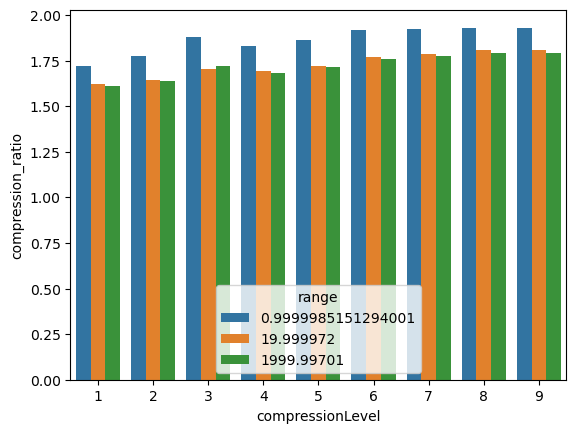

/tmp/ipykernel_7276/4138421082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["max"] - df["min"]
/tmp/ipykernel_7276/4138421082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["range"].astype("category")


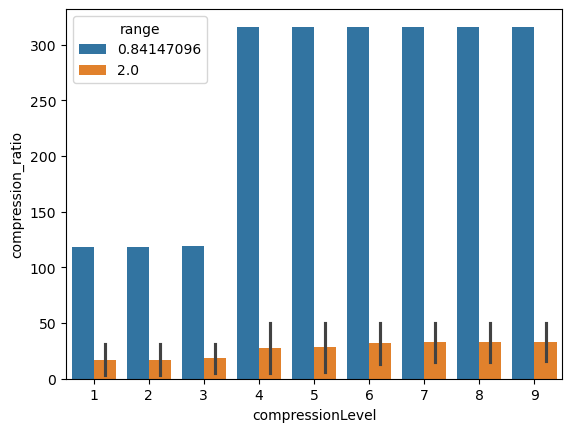

/tmp/ipykernel_7276/4138421082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["max"] - df["min"]
/tmp/ipykernel_7276/4138421082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["range"].astype("category")


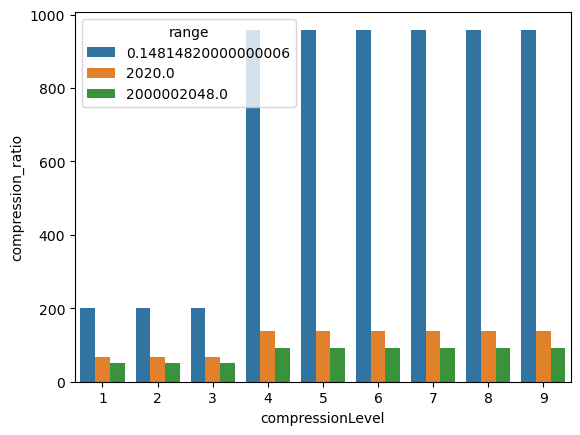

/tmp/ipykernel_7276/4138421082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["max"] - df["min"]
/tmp/ipykernel_7276/4138421082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["range"] = df["range"].astype("category")


ValueError: Could not interpret value `compressionLevel` for `x`. An entry with this name does not appear in `data`.

In [ ]:
def plotTestSet_zlib(df):
    df["range"] = df["max"] - df["min"]
    df["range"] = df["range"].astype("category")
    
    ax = sns.barplot(df, x="compressionLevel", y="compression_ratio", hue="range")
    # ax.set_title(df["name"][0])
    plt.show()
    
plotTestSet_zlib(zlib_df[zlib_df["name"] == "paramSweep_zlib_UniformRandom"])
plotTestSet(zlib_df[zlib_df["name"] == "paramSweep_zlib_Sine"])
plotTestSet(zlib_df[zlib_df["name"] == "paramSweep_zlib_Poly"])
plotTestSet(sz3_df[sz3_df["name"] == "paramSweep_sz3_UniformRandom"])   
plotTestSet(sz3_df[sz3_df["name"] == "paramSweep_sz3_Sine"])
plotTestSet(sz3_df[sz3_df["name"] == "paramSweep_sz3_Poly"])